In [2]:
%pip install POT

   ---------------------------------------- 0.0/348.6 kB ? eta -:--:--
   --------------------- ------------------ 184.3/348.6 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 348.6/348.6 kB 7.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ot  # pip install POT

Niveau 1/4 : taille 16
Niveau 2/4 : taille 32
Niveau 3/4 : taille 64
Niveau 4/4 : taille 128


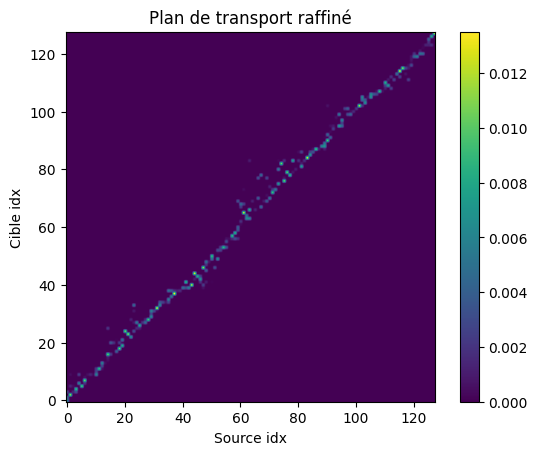

In [5]:
def generate_data(n):
    """ Génère deux distributions aléatoires. """
    a = np.random.rand(n)
    b = np.random.rand(n)
    a /= np.sum(a)
    b /= np.sum(b)
    return a, b

def hierarchical_refinement(a, b, n_levels=3):
    """ 
    Résout le problème de transport de manière hiérarchique.
    De grossier vers fin.
    """
    n = len(a)
    assert len(b) == n, "Les deux distributions doivent avoir la même taille."
    
    # Création d'une grille de coûts (euclidean simple ici)
    x = np.linspace(0, 1, n).reshape((n, 1))
    M_full = ot.utils.dist(x, x, metric='euclidean')
    
    # Démarre avec une version très coarsifiée
    plans = []
    for level in range(n_levels):
        factor = 2 ** (n_levels - level - 1)
        idx = np.arange(0, n, factor)
        
        a_coarse = a[idx]
        b_coarse = b[idx]
        
        # Correction importante : normalisation !!
        a_coarse /= np.sum(a_coarse)
        b_coarse /= np.sum(b_coarse)
        
        M_coarse = M_full[np.ix_(idx, idx)]
        
        # Résolution du problème OT au niveau grossier
        plan = ot.emd(a_coarse, b_coarse, M_coarse)
        plans.append((idx, plan))
        
        print(f"Niveau {level+1}/{n_levels} : taille {len(idx)}")
        
    return plans

# Exemple d'utilisation
n = 128  # Nombre de points
a, b = generate_data(n)
plans = hierarchical_refinement(a, b, n_levels=4)

# Affichage du dernier plan raffiné
idx, plan = plans[-1]

plt.imshow(plan, origin='lower')
plt.title("Plan de transport raffiné")
plt.xlabel('Source idx')
plt.ylabel('Cible idx')
plt.colorbar()
plt.show()